In [2]:
print('hi')

hi


In [3]:
print(1+1)

2


In [4]:
import pandas as pd
import numpy as np 


In [8]:
df = pd.read_csv('weight-height.csv')

In [9]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'height')

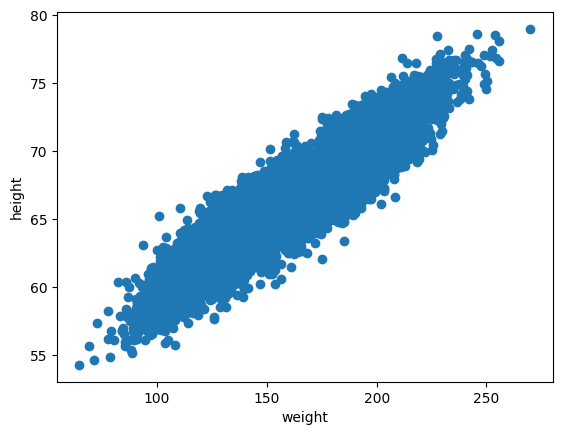

In [12]:
##using scatter plot technique
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")

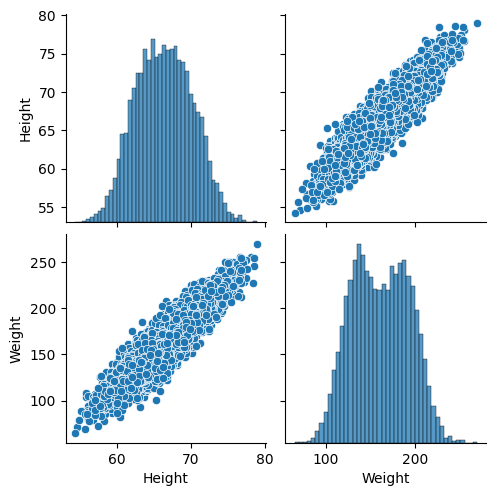

In [14]:
import seaborn as sns
sns.pairplot(df)

In [20]:
##dividing the dataset into independent and dependent variables
X=df[['Weight']]##always the independent feature should be a 2d Array i.e. with double bracs
Y =df['Height']##we can have the dependent value as 1d array(no issues in this)

In [23]:
##now train test split 
## we have to train nd test data 
##as we saw overfitting and underfitting conditions
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [24]:
X_train.shape

(7500, 1)

In [27]:
##we use standardization test for linear regression
##formula is our ztest waala x-u/sd where u = 0 and sd = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)##we use fit transform only for our training data 
X_test = scaler.transform(X_test)##we use transform only for ur test data set

In [28]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()##always initialize the object from import first 

In [29]:
regression.fit(X_train,Y_train)##always contains 2d arrays 

LinearRegression()

In [30]:
regression.coef_##this is the slope of our equation i.e m or theta1 or beta1 etc in my book  

array([3.56816498])

In [31]:
regression.intercept_##this is our y intercept

np.float64(66.38889144473505)

In [32]:
print(regression.coef_)##this means that after unit movement in our weight section 3.5681...is the movement in the height data 
print(regression.intercept_)##this means that when our line is meeting the y axis 

[3.56816498]
66.38889144473505


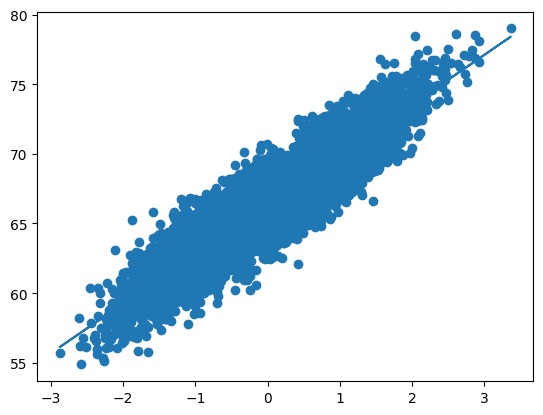

In [33]:
##plotting the best fit line wrt to train data
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

PREDICTED OUTPUT => Y=MX+C 
WHICH ALSO MEANS INTECEPT + COEF(WEIGHT)

In [36]:
##PREDICTION FOR TEST DATA
Y_pred = regression.predict(X_test)

In [35]:
##performance metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [37]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)##using y becoz prediction of height and x was weight and y is height
rmse = np.sqrt(mse)##root mean squared error 
print(mse)
print(mae)
print(rmse)

2.177539308731947
1.1851633564772588
1.4756487755329677


USING R SQUARE TEST NOW 

In [39]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
print(score)

0.8509489137717359


In [43]:
##PREDICTION FOR NEW DATA 
regression.predict([[72]])

array([323.29676996])

In [50]:
##this 323 is wrong coz 323 cm cannot be a height of someone 
##we didnt use standardization thats why 323 coming
##using standardization
regression.predict(scaler.transform([[72]]))


array([66.38889144])